Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock, Germany

Tutorial Digital Signal Processing (Course #24505),
**DFT and Windowing**,
Winter Semester 2019/20

Feel free to contact lecturer frank.schultz@uni-rostock.de

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.signal import windows

## Task a)

Generate two sine signals of $f_1=200$ Hz and $f_2=200.25$ Hz and amplitude $|x[k]|_\text{max}=1$ for the sampling frequency $f_s=800$ Hz in the range of $0\leq k<N=1600$.

In [2]:
# a)
f1 = 200  # Hz
f2 = 200.25  # Hz
fs = 800  # Hz
N = 1600
k = np.arange(0,N)
x1 = np.sin(2*np.pi*f1/fs*k)
x2 = np.sin(2*np.pi*f2/fs*k)

## Task b) 

Generate
- a rectangular window, 
- a Hanning window and
- a flat top window

with the same lengths as the sine signals. Note: we analyze signals, so we use `sym=False` (periodic window) rather than `sym=True` (symmetric window, used for FIR filter design). Plot the obtained window signals over $k$.

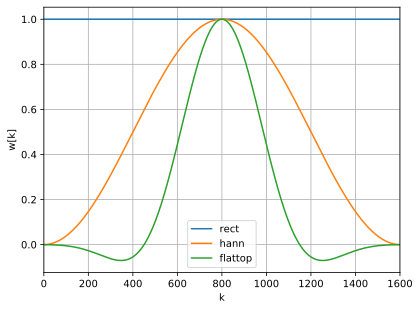

In [3]:
# b)
wrect = np.ones(N)
whann = windows.hann(N, sym=False)
wflattop = windows.flattop(N, sym=False)
plt.plot(wrect, label='rect')
plt.plot(whann, label='hann')
plt.plot(wflattop, label='flattop')
plt.xlabel('k')
plt.ylabel('w[k]')
plt.xlim(0, N)
plt.legend()
plt.grid(True)

## Task c)

 Window both sine signals with the three windows and calculate the corresponding DFT spectra using FFT algorithm either from `numpy.fft` or `scipy.fftpack` package.

In [4]:
# c)
x1wrect = x1  # nothing to window when using rect window
X1wrect = fftpack.fft(x1wrect)  # X1wrect = np.fft.fft(x1wrect)

x2wrect = x2
X2wrect = fftpack.fft(x2wrect)

x1whann = x1*whann
X1whann = fftpack.fft(x1whann)

x2whann = x2*whann
X2whann = fftpack.fft(x2whann)

x1wflattop = x1*wflattop
X1wflattop = fftpack.fft(x1wflattop)

x2wflattop = x2*wflattop
X2wflattop = fftpack.fft(x2wflattop)

## Task d)

Plot the **normalized** level of the DFT spectra in between 175 Hz and 225 Hz and -50 and 0 dB.

Note that we are dealing with analysis of sine signals, so a convenient **normalization** should be applied for the shown level. This can be achieved by making the result independent from the chosen DFT length $N$. Furthermore, considering negative and positive frequency bins, multiplying with 2 yields normalization to sine signal amplitudes. Since the frequency bin for 0 Hz and (if $N$ is even) for $f_s/2$ exists only once, multiplication with 2 is not required for these bins.

### Preparations for solution

It is meaningful to define a function that returns the level of DFT in term of sine signal normalization.

Furthermore, the DFT frequency vector should be set up.

In [5]:
# this handling is working for N even and odd: 
def fft2db(X):
    N = X.size
    Xtmp = 2/N*X  # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1/2  #bin for f=0 Hz is existing only once, so cancel *2 from above
    if N % 2 == 0:  # fs/2 is included as a bin
        Xtmp[N//2] = Xtmp[N//2] / 2  # fs/2 bin is existing only once, so cancel *2 from above
    return 20*np.log10(np.abs(Xtmp))  # in dB

#setup of frequency vector this way is independent of N even/odd:
df = fs/N
f = np.arange(0, N)*df

The proposed handling is independent of N odd/even and returns the whole DFT spectrum. Since we normalized for physical sine frequencies, only the part from 0 Hz to fs/2 is valid.
So, make sure that spectrum returned from fft2db is only plotted up to fs/2.

### Solution

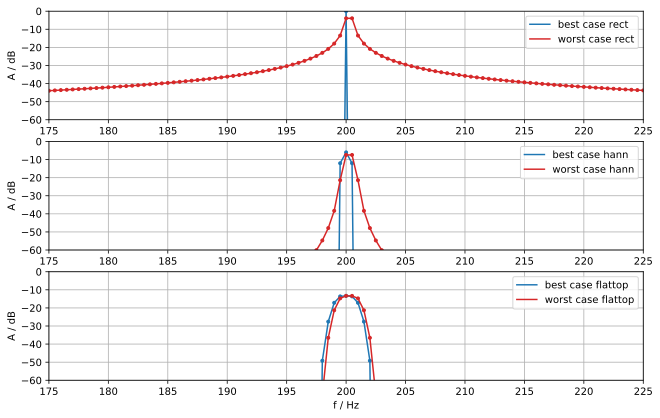

In [6]:
plt.figure(figsize=(16/1.5,10/1.5))
plt.subplot(3,1,1)
plt.plot(f, fft2db(X1wrect), label='best case rect', color='C0')
plt.plot(f, fft2db(X1wrect), 'o', color='C0', markersize=3)
plt.plot(f, fft2db(X2wrect), label='worst case rect', color='C3')
plt.plot(f, fft2db(X2wrect), 'o', color='C3', markersize=3)
plt.xlim(175, 225)
plt.ylim(-60,0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-60,10,10))
plt.legend()
#plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(f, fft2db(X1whann), label='best case hann', color='C0')
plt.plot(f, fft2db(X1whann), 'o', color='C0', markersize=3)
plt.plot(f, fft2db(X2whann), label='worst case hann', color='C3')
plt.plot(f, fft2db(X2whann), 'o', color='C3', markersize=3)
plt.xlim(175, 225)
plt.ylim(-60,0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-60,10,10))
plt.legend()
#plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(f, fft2db(X1wflattop), label='best case flattop', color='C0')
plt.plot(f, fft2db(X1wflattop), 'o', color='C0', markersize=3)
plt.plot(f, fft2db(X2wflattop), label='worst case flattop', color='C3')
plt.plot(f, fft2db(X2wflattop), 'o', color='C3', markersize=3)
plt.xlim(175, 225)
plt.ylim(-60,0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-60,10,10))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

## Task e)
Plot the level of the window DTFT spectra normalized to their mainlobe maximum for $-\pi \leq \Omega \leq \pi$ and -120 dB to 0 dB. Use zero-padding or the formulas for interpolation towards the DTFT to achieve a sufficiently high resolution of the spectra. To inspect the mainlobe in detail spectra might be plotted within the range $-\pi/100 \leq \Omega \leq \pi/100$ as well.

### Preparations for solution

It is again meaningful to define a function that returns the quasi-DTFT and the evaluated digital frequencies.
Here is a proposal using zeropadding (to obtain DTFT-like frequency resolution) and fftshift (to bring mainlobe into the middle of numpy array), which then requires Omega from -pi to pi. 

In [7]:
def winDTFTdB(w):
    N = w.size  # get window length
    Nz = 100*N  # zeropadding length
    W = np.zeros(Nz)  # allocate RAM
    W[0:N] = w  # insert window
    W = np.abs(fftpack.fftshift(fftpack.fft(W)))  # fft, fftshift and magnitude
    W /= np.max(W)  # normalize to maximum, i.e. the mainlobe maximum here
    W = 20*np.log10(W)  # get level in dB
    Omega = 2*np.pi/Nz*np.arange(0,Nz) - np.pi  # get appropriate digital frequencies
    return Omega, W

/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


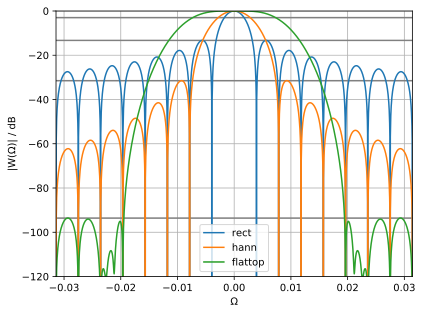

In [8]:
plt.plot([-np.pi, +np.pi],[-3.01, -3.01],'gray')  # mainlobe bandwidth
plt.plot([-np.pi, +np.pi],[-13.3, -13.3], 'gray')  # rect max sidelobe
plt.plot([-np.pi, +np.pi],[-31.5, -31.5], 'gray')  # hann max sidelobe
plt.plot([-np.pi, +np.pi],[-93.6, -93.6], 'gray')  # flattop max sidelobe
Omega, W = winDTFTdB(wrect)
plt.plot(Omega,W, label='rect')
Omega, W = winDTFTdB(whann)
plt.plot(Omega,W, label='hann')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega,W, label='flattop')
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 0)

plt.xlim(-np.pi/100, np.pi/100)  # zoom mainlobe

plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)

## Task f)

Interpret the results of d) with the help of e) regarding the best and worst case for the different windows. Why do the results for the signals with frequencies $f_1$ and $f_2$ differ?

This is the key question of the windowing concept. Check the DFT/window script for possible explanations.

## Task g)

1. Determine the width of the main lobe (at the -3 dB cut frequencies) in terms of physical frequency and digital frequency.

2. Determine the attenuation of the highest side lobe from the window spectra.

For 1. The mainlobe bandwidth can be computed comparably easy, assumed that zeropadding resolution is high enough. Just find that Omega, for which W gets larger than -3 dB. Starting from Omega=-pi, one can not miss it. Then doubling the found value gives the bandwidth.

In [9]:
Omega, W = winDTFTdB(wrect)
BW = Omega[W>=-3.01]
print('rect window mainlobe bandwidth is',(-BW[0]*2)*fs/(2*np.pi),'Hz,', (-BW[0]*2), 'rad')

Omega, W = winDTFTdB(whann)
BW = Omega[W>=-3.01]
print('hann window mainlobe bandwidth is',(-BW[0]*2)*fs/(2*np.pi),'Hz,', (-BW[0]*2), 'rad')

Omega, W = winDTFTdB(wflattop)
BW = Omega[W>=-3.01]
print('flattop window mainlobe bandwidth is',(-BW[0]*2)*fs/(2*np.pi),'Hz,', (-BW[0]*2), 'rad')

rect window mainlobe bandwidth is 0.44000000000004047 Hz, 0.0034557519189490904 rad
hann window mainlobe bandwidth is 0.7200000000000457 Hz, 0.005654866776461986 rad
flattop window mainlobe bandwidth is 1.859999999999986 Hz, 0.014608405839192429 rad


/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


For 2. This is a little bit more tricky, since you should find it starting from the mainlobe, falling into the first zero and then find the maximum level of the sidelobes. Think about how to compute this elegantly.

The plot above for task e) indicated the sidelobe levels with gray lines. You'll find that maximum sidelobe level is -13.3 dB for rectangular (always equal to first sidelobe), -31.5 dB for Hann (always equal to first sidelobe), -93.6 dB for Flattop window compared to the 0dB mainlobe maximum.

## Task h)

Explain for which signal analysis task the rectangular window and the flat top window should be used.

- Rectangular has good frequency resolution (narrow mainlobe), but bad sidelobe suppression, thus deviations from DFT eigenfrequencies lead to large estimation errors of the spectrum's magnitude.

- Flattop has bad frequency resolution (wide mainlobe), but good sidelobe suppression, thus deviations from DFT eigenfrequencies lead to small estimation errors of the spectrum's magnitude.

So, use a rectangular window if frequency resolution must be very high, use a flattop window if magnitude estimation error must be small.


## Task i)

Do some research on your own: Which advantages exhibit the Kaiser-Bessel and the Dolph-Chebyshev windows compared to the so far used windows here?

The Kaiser-Bessel and the Dolph-Chebyshev window are members of the so called parametric windows family.
See the Jupyter notebook `parametric_windows.ipynb` for details.
We have seen that mainlobe width and sidelobe suppression is always a tradeoff. The rect, hann and flattop window are so called non-parametric windows only having window length $N$ as parameter and by that exhibit a certain, fixed mainlobe/sidelobe trade-off by design.

Parametric windows, besides length $N$ (which is often fixed due to measurement constraints), allow to change at least one more parameter, which precisely varies the trade-off between mainlobe width and sidelobe suppression. The specific trade-off characteristic follows a certain design criterion.
For example the Dolph-Chebyshev window asks for equal desired sidelobe level, whereas the Kaiser-Bessel asks for mainlobe energy concentration for a desired bandwidth. 

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises